Face Recognition Model Training

In [65]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [21]:
import pathlib
from pathlib import Path
data_dir= Path('.\\Dataset\\Bollywood Actors')
data_dir

WindowsPath('Dataset/Bollywood Actors')

In [25]:
len(list(data_dir.glob('*/*.jpg')))

200

In [29]:
kajol = list(data_dir.glob('Kajol/*'))
kajol[:5]

[WindowsPath('Dataset/Bollywood Actors/Kajol/020c8348eb.jpg'),
 WindowsPath('Dataset/Bollywood Actors/Kajol/0e0a5aeb6a.jpg'),
 WindowsPath('Dataset/Bollywood Actors/Kajol/0ffdf7e976.jpg'),
 WindowsPath('Dataset/Bollywood Actors/Kajol/10a4a43368.jpg'),
 WindowsPath('Dataset/Bollywood Actors/Kajol/171aae4df1.jpg')]

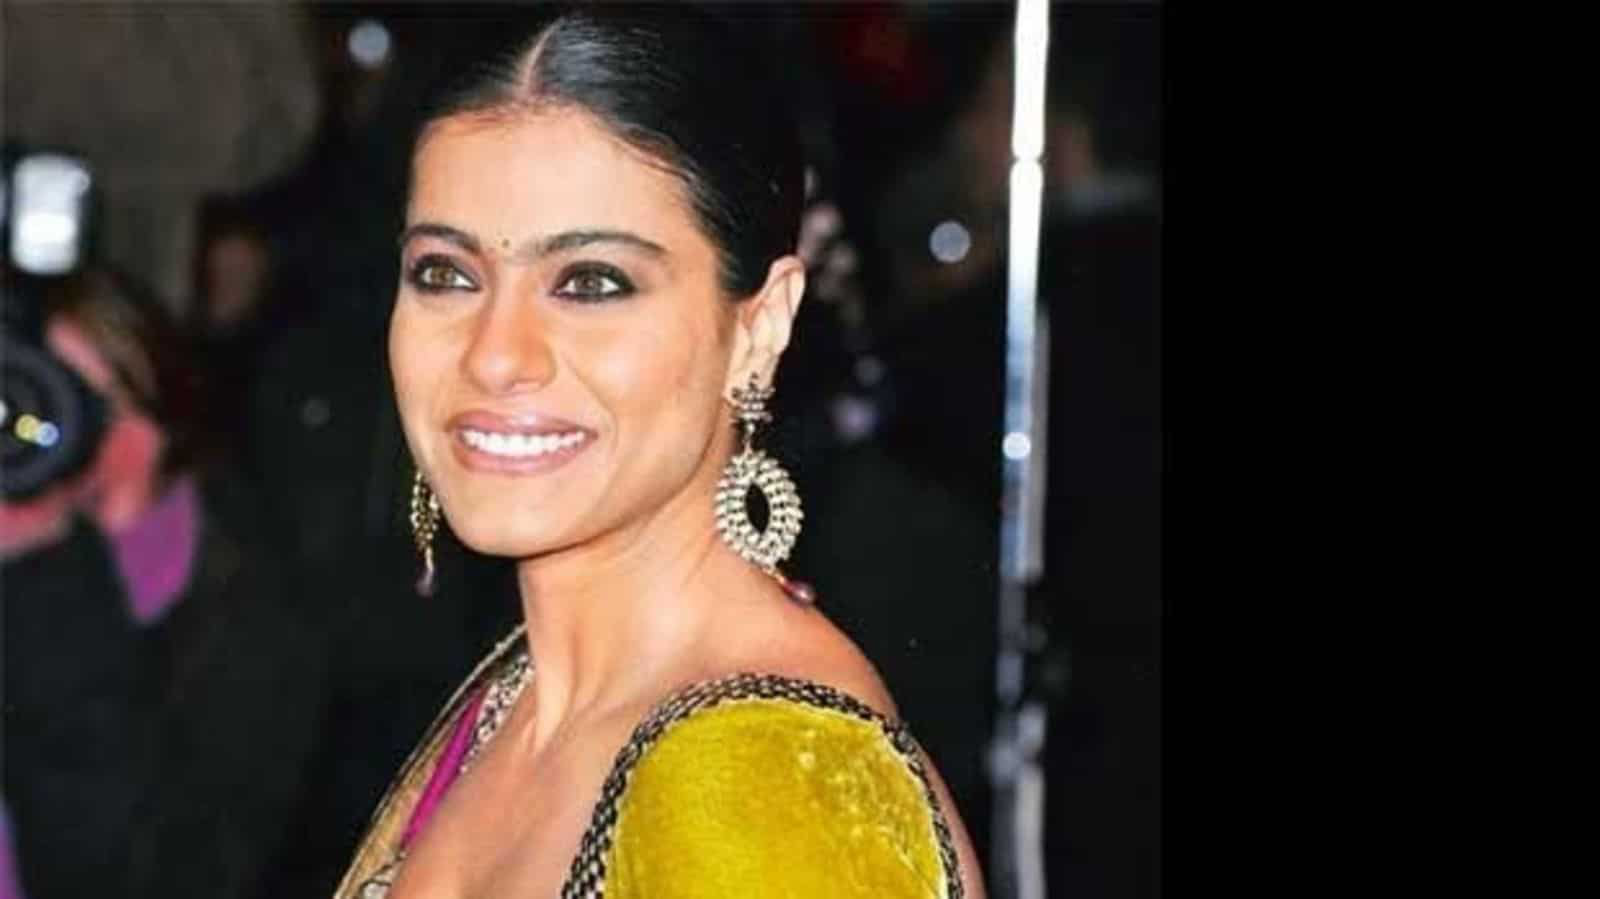

In [85]:
PIL.Image.open(str(kajol[2]))

In [35]:
ajay = list(data_dir.glob('Ajay Devgan/*'))

In [37]:
 actor_images_dict = {
     'kajol' : list(data_dir.glob('Kajol/*')),
     'ajay' : list(data_dir.glob('Ajay Devgan/*')),
'madhuri' : list(data_dir.glob('Madhuri Dixit/*')),
'shahrukh' : list(data_dir.glob('Shahrukh Khan/*'))}

In [41]:
 actor_labels_dict = {
     'kajol' : 0,
     'ajay' : 1,
'madhuri' : 2,
'shahrukh' : 3}

In [43]:
img= cv2.imread(str( actor_images_dict['kajol'][0]))
img.shape

(194, 259, 3)

In [45]:
x,y=[],[]
for actor_name, actors in  actor_images_dict.items():
    for actor in actors:
        img = cv2.imread(str(actor))
        resized_img= cv2.resize(img,(180,180))
        x.append(resized_img)
        y.append(actor_labels_dict[actor_name])

In [51]:
x=np.array(x)
y= np.array(y)


In [53]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, random_state=0)

In [55]:
x_train_scaled=x_train/255
x_test_scaled = x_test/255

In [87]:
num_classes = 4
# data_augmentation= keras.Sequential([
#     layers.Experimental.preprocessing.RandomZoom(0,3),])
model = Sequential([
                     layers.Conv2D(16,3, padding= 'same', activation='relu'),
                     layers.MaxPooling2D(),
                     layers.Conv2D(32,3, padding= 'same', activation='relu'),
                     layers.MaxPooling2D(),
                     layers.Conv2D(64,3, padding= 'same', activation='relu'),
                     layers.MaxPooling2D(),
                     layers.Dropout(0.2),
                     layers.Flatten(),
                     layers.Dense(128,activation='relu'),
                     layers.Dense(num_classes)])
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.fit(x_train_scaled,y_train,epochs=30)

Epoch 1/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 24s 548ms/step - accuracy: 0.2319 - loss: 1.7006
Epoch 2/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 424ms/step - accuracy: 0.4006 - loss: 1.3599
Epoch 3/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 422ms/step - accuracy: 0.6687 - loss: 1.2923
Epoch 4/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 389ms/step - accuracy: 0.6069 - loss: 1.1552
Epoch 5/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 346ms/step - accuracy: 0.7887 - loss: 0.8968
Epoch 6/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 363ms/step - accuracy: 0.7986 - loss: 0.6380
Epoch 7/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 350ms/step - accuracy: 0.9212 - loss: 0.3681
Epoch 8/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 396ms/step - accuracy: 0.9715 - loss: 0.2139
Epoch 9/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 372ms/step - accuracy: 0.9555 - loss: 0.1896
Epoch 10/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 369ms/step - accuracy: 0.9869 - loss: 0.0958
Epoch 11/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 361ms/step - accuracy: 1.0000 - loss: 0.0420
Epoch 12/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 361ms/step - accuracy: 1.0000 - l

In [79]:
model.evaluate(x_test_scaled,y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 266ms/step - accuracy: 0.4838 - loss: 3.7404


[3.7665374279022217, 0.46000000834465027]